In [1]:
# Cell 1: Import Libraries and Load Model
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt  # Importing pyplot for displaying images

# Load TFLite model and allocate tensors.
model_path = "ei-dog-detector-transfer-learning-tensorflow-lite-float32-model.lite"  # Update this path
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

(120, 160)


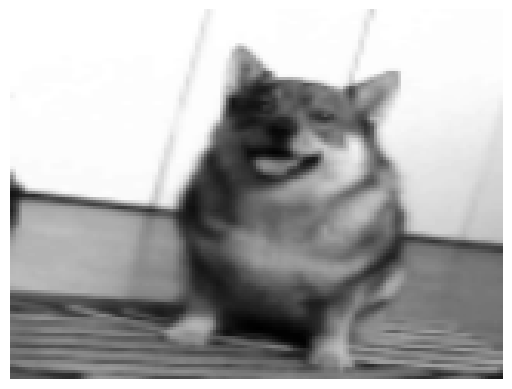

In [2]:
# Cell 2: Load and Display Image
# Load the image
image_path = "../../module 2/Transfer learning/dog-classification-png/dog/21.png"  # Update this path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image for processing
    image_resized = cv2.resize(image_gray, (160, 120))  # Resize to input size

    print(image_resized.shape)
    
    # Display the grayscale image
    plt.imshow(image_resized, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

In [3]:
# Cell 3: Define Sliding Window Function
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1] + 1, step_size):
        for x in range(0, image.shape[1] - window_size[0] + 1, step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

window_size = (30, 30)  # Size of the window (width, height)
step_size = 30  # How much to move the window

In [4]:
# Cell 4: Prepare for Detection
bboxes = []  # List to store bounding boxes and probabilities
image_resized2 = image_resized.copy()  # Make a copy to draw on

for (x, y, window) in sliding_window(image_resized, step_size, window_size):
    # Prepare the window for inference
    input_data = cv2.resize(window, (input_details[0]['shape'][2], input_details[0]['shape'][1]))

    # Since we are using grayscale, we need to add the channel dimension
    input_data = np.expand_dims(input_data, axis=-1)  # Add channel dimension
    input_data = np.expand_dims(input_data, axis=0).astype(np.float32)  # Reshape for model input

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prob = output_data[0][1]  # Assuming class 1 is "dog"

    # Store bounding box information if the probability exceeds the threshold
    if prob >= 0.8:
        bboxes.append((x, y, window_size[0], window_size[1], prob))  # Add (x, y, width, height, probability)

# Draw bounding boxes on the image
for bb in bboxes:
    # Draw rectangle around detected object in red
    cv2.rectangle(image_resized2, (bb[0], bb[1]), (bb[0] + bb[2], bb[1] + bb[3]), (0, 0, 255), 1)  # Red color (BGR)
    
    # Display probability on top of the rectangle with smaller text
    prob_text = f"{bb[4]:.2f}"  # Format probability to two decimal places
    cv2.putText(image_resized2, prob_text, (bb[0] + 2, bb[1] + 12), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0, 0, 255), 1)  # Smaller text

# Print detection result
if bboxes:
    print("Detected bounding boxes:")
    for bb in bboxes:
        print(f"x: {bb[0]}, y: {bb[1]}, w: {bb[2]}, h: {bb[3]}, prob: {bb[4]:.2f}")
else:
    print("No dog detected.")

Detected bounding boxes:
x: 60, y: 30, w: 30, h: 30, prob: 0.99
x: 90, y: 30, w: 30, h: 30, prob: 0.94


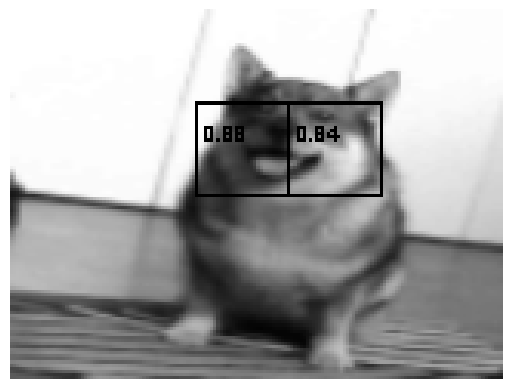

In [5]:
# Cell 5: Display the Output Image
plt.imshow(cv2.cvtColor(image_resized2, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')  # Hide axis
plt.show()